In [20]:
# Importation des librairies de base

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import gaussian_kde    
from scipy.stats import probplot
from scipy.stats import ttest_rel

import wrds
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')


from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant


## Question 1 - A


In [21]:
csv = pd.read_csv('coin_Bitcoin.csv')

csv

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59,54204.929760,45290.590270,54204.929760,48824.426870,1.061020e+11,9.099260e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59,51290.136690,47213.498160,48835.087660,49705.333320,6.369552e+10,9.263930e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59,51948.966980,47093.853020,49709.082420,47093.853020,5.450657e+10,8.777660e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59,48370.785260,44454.842110,47180.464050,46339.760080,3.509680e+11,8.637520e+11


In [22]:
# Calcul des rendements avec pct_change()
csv['Returns'] = csv['Close'].pct_change()

# Supprimer les lignes avec des NaN
csv = csv.dropna()

csv

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Returns
1,2,Bitcoin,BTC,2013-04-30 23:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,-0.038328
2,3,Bitcoin,BTC,2013-05-01 23:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,-0.158345
3,4,Bitcoin,BTC,2013-05-02 23:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,-0.100692
4,5,Bitcoin,BTC,2013-05-03 23:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,-0.070906
5,6,Bitcoin,BTC,2013-05-04 23:59,115.000000,92.500000,98.099998,112.500000,0.000000e+00,1.250317e+09,0.150895
...,...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59,54204.929760,45290.590270,54204.929760,48824.426870,1.061020e+11,9.099260e+11,-0.099302
2858,2859,Bitcoin,BTC,2021-02-24 23:59,51290.136690,47213.498160,48835.087660,49705.333320,6.369552e+10,9.263930e+11,0.018042
2859,2860,Bitcoin,BTC,2021-02-25 23:59,51948.966980,47093.853020,49709.082420,47093.853020,5.450657e+10,8.777660e+11,-0.052539
2860,2861,Bitcoin,BTC,2021-02-26 23:59,48370.785260,44454.842110,47180.464050,46339.760080,3.509680e+11,8.637520e+11,-0.016013


### Statistiques descriptives des rendements

In [ ]:
# Convertir la colonne Date en datetime
csv['Date'] = pd.to_datetime(csv['Date'])

# Statistiques descriptives des rendements
stats_desc = pd.DataFrame({
    'Statistique': ['Moyenne', 'Médiane', 'Écart-type', 'Min', 'Max', 
                    'Asymétrie (Skewness)', 'Aplatissement (Kurtosis)', 'Observations'],
    'Valeur': [
        csv['Returns'].mean(),
        csv['Returns'].median(),
        csv['Returns'].std(),
        csv['Returns'].min(),
        csv['Returns'].max(),
        skew(csv['Returns']),
        kurtosis(csv['Returns']),
        len(csv['Returns'])
    ]
})

stats_desc

,Statistique,Valeur
0,Moyenne,0.002922
1,Médiane,0.001919
2,Écart-type,0.042496
3,Min,-0.371695
4,Max,0.429680
5,Asymétrie (Skewness),0.261226
6,Aplatissement (Kurtosis),10.798490
7,Observations,2861.000000


### Graphique de série temporelle des rendements

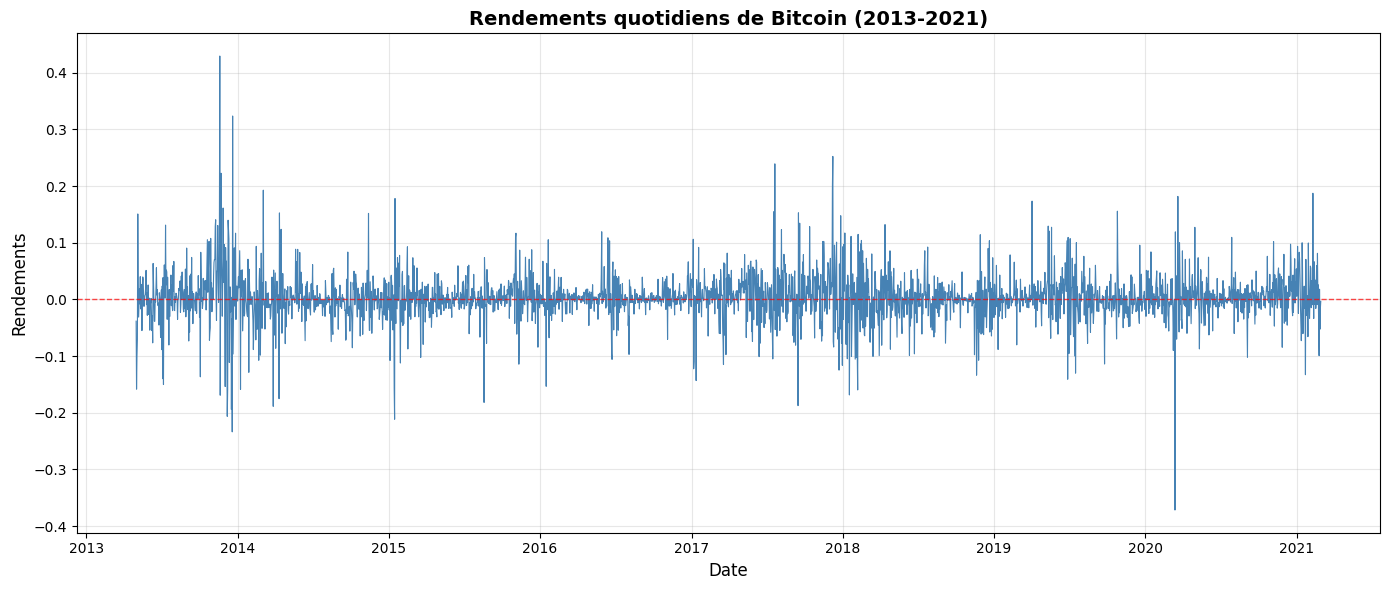

In [31]:
# Graphique de série temporelle des rendements
plt.figure(figsize=(14, 6))
plt.plot(csv['Date'], csv['Returns'], linewidth=0.8, color='steelblue')
plt.title('Rendements quotidiens de Bitcoin (2013-2021)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rendements', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Discussion des résultats

**Statistiques descriptives :**
- **Moyenne** : Le rendement quotidien moyen indique la performance moyenne du Bitcoin sur la période
- **Écart-type** : Mesure la volatilité (risque) des rendements quotidiens
- **Asymétrie (Skewness)** : Indique si la distribution est asymétrique (positive = queue à droite, négative = queue à gauche)
- **Aplatissement (Kurtosis)** : Mesure l'épaisseur des queues de distribution (> 0 = queues épaisses, risque de rendements extrêmes)

**Graphique de série temporelle :**
- Le graphique montre la volatilité variable au fil du temps (clustering de volatilité)
- Les périodes de forte volatilité correspondent souvent à des événements majeurs du marché
- La ligne rouge à zéro permet d'identifier les périodes de rendements positifs vs négatifs

## Question 1 - B


## Modèle AR(2)-GARCH(1,1)

In [43]:
# Importation de la librairie arch
from arch import arch_model

# Préparation des données (rendements en pourcentage pour une meilleure convergence)
returns_pct = csv['Returns'] * 100

# Estimation du modèle AR(2)-GARCH(1,1) avec erreurs normalement distribuées
model = arch_model(returns_pct, 
                   mean='AR', 
                   lags=2,
                   vol='GARCH', 
                   p=1, 
                   q=1,
                   dist='normal')

# Estimation du modèle
results = model.fit(disp='off')

# Afficher le résumé complet
print(results.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                Returns   R-squared:                      -0.002
Mean Model:                        AR   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -7798.33
Distribution:                  Normal   AIC:                           15608.7
Method:            Maximum Likelihood   BIC:                           15644.4
                                        No. Observations:                 2859
Date:                Mon, Dec 08 2025   Df Residuals:                     2856
Time:                        15:26:42   Df Model:                            3
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const           0.1944  5.915e-02      3.287  1.012e

In [44]:
# Création d'un tableau formaté avec les paramètres estimés
params_table = pd.DataFrame({
    'Paramètre': results.params.index,
    'Coefficient': results.params.values,
    'Erreur Standard': results.std_err.values,
    'Valeur-p': results.pvalues.values
})

# Formater le tableau
params_table['Coefficient'] = params_table['Coefficient'].map('{:.6f}'.format)
params_table['Erreur Standard'] = params_table['Erreur Standard'].map('{:.6f}'.format)
params_table['Valeur-p'] = params_table['Valeur-p'].map('{:.6f}'.format)

print("Tableau des paramètres estimés du modèle AR(2)-GARCH(1,1)")
print("="*70)
params_table

Tableau des paramètres estimés du modèle AR(2)-GARCH(1,1)


,Paramètre,Coefficient,Erreur Standard,Valeur-p
0,Const,0.194441,0.059151,0.001012
1,Returns[1],-0.001836,0.027168,0.946133
2,Returns[2],0.028816,0.022534,0.200969
3,omega,0.711226,0.275865,0.009932
4,alpha[1],0.142627,0.035448,0.000057
5,beta[1],0.829453,0.035587,0.000000


### Graphiques : Résidus standardisés et Volatilité conditionnelle

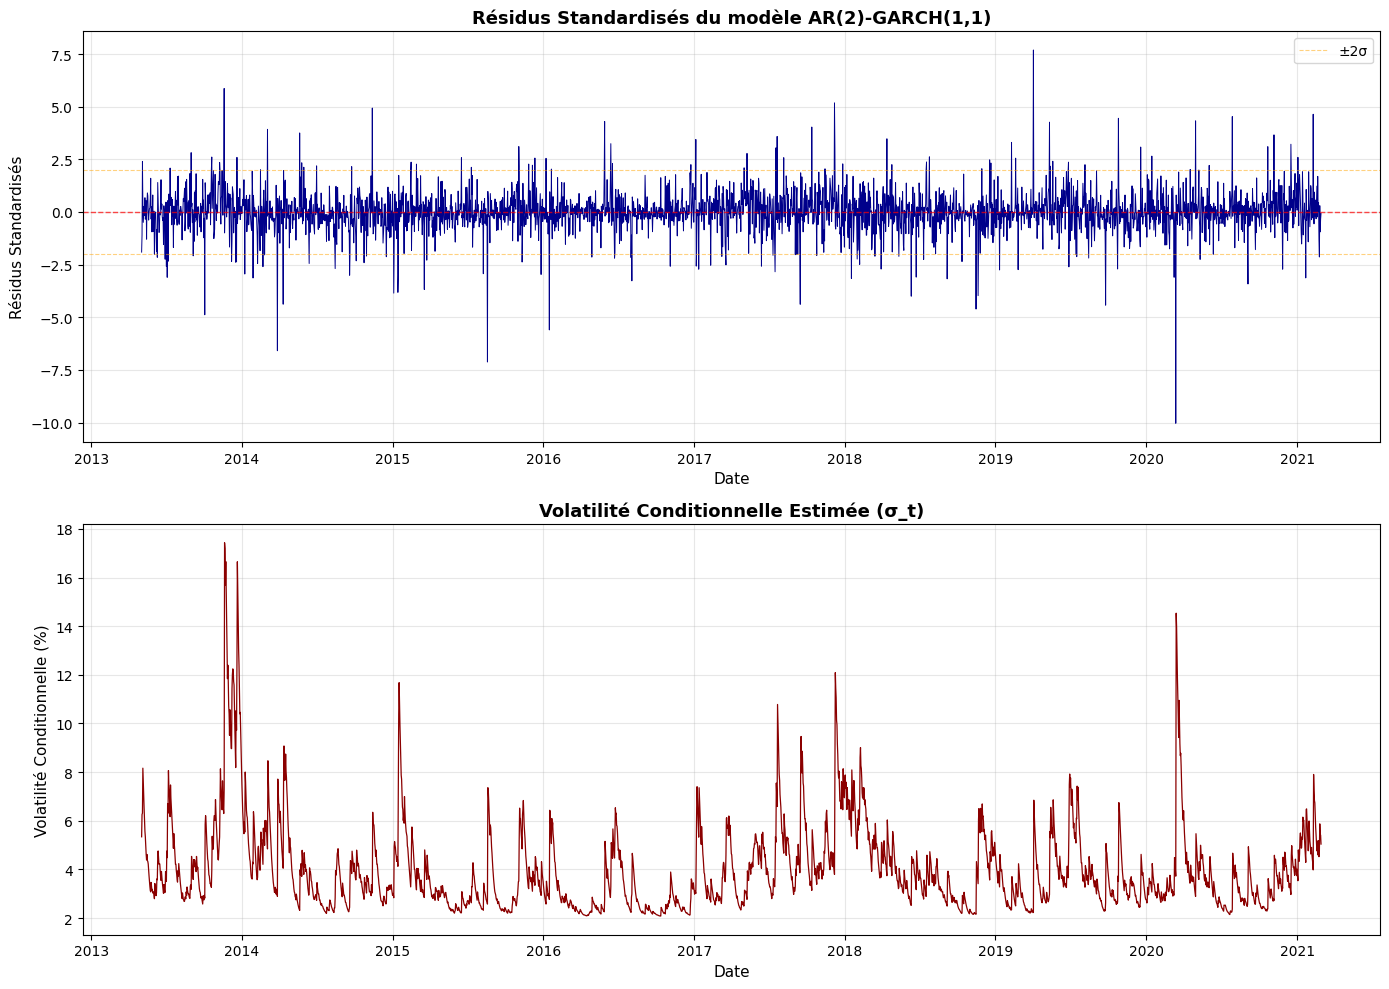


Dimensions : Dates=2861, Résidus=2861, Vol Cond=2861


In [50]:
# Extraction des résidus standardisés et de la volatilité conditionnelle
standardized_resid = results.std_resid
conditional_vol = results.conditional_volatility

# Les dates doivent correspondre aux résidus (même longueur que les résidus)
# Le modèle a été estimé sur returns_pct qui a la même longueur que csv
dates_for_plot = csv['Date'].values

# Créer une figure avec deux graphiques
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Graphique 1: Résidus standardisés
axes[0].plot(dates_for_plot, standardized_resid, linewidth=0.7, color='darkblue')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
axes[0].axhline(y=2, color='orange', linestyle='--', linewidth=0.8, alpha=0.5, label='±2σ')
axes[0].axhline(y=-2, color='orange', linestyle='--', linewidth=0.8, alpha=0.5)
axes[0].set_title('Résidus Standardisés du modèle AR(2)-GARCH(1,1)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=11)
axes[0].set_ylabel('Résidus Standardisés', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Graphique 2: Volatilité conditionnelle
axes[1].plot(dates_for_plot, conditional_vol, linewidth=0.9, color='darkred')
axes[1].set_title('Volatilité Conditionnelle Estimée (σ_t)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=11)
axes[1].set_ylabel('Volatilité Conditionnelle (%)', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDimensions : Dates={len(dates_for_plot)}, Résidus={len(standardized_resid)}, Vol Cond={len(conditional_vol)}")

### Interprétation des résultats du modèle AR(2)-GARCH(1,1)

**Paramètres estimés :**

**Modèle de moyenne (AR(2)) :**
- **Const (μ)** = 0.194 (p < 0.001) : Rendement moyen significativement positif de 0.194% par jour
- **Returns[1]** = -0.0018 (p = 0.946) : Le rendement d'hier n'a pas d'effet significatif
- **Returns[2]** = 0.0288 (p = 0.201) : Le rendement d'il y a 2 jours n'a pas d'effet significatif non plus

**Modèle de volatilité (GARCH(1,1)) :**
- **ω (omega)** = 0.711 (p < 0.01) : Volatilité de base significative
- **α (alpha[1])** = 0.143 (p < 0.001) : Impact des chocs passés sur la volatilité actuelle
- **β (beta[1])** = 0.829 (p < 0.001) : Persistance de la volatilité très élevée
- **α + β** = 0.972 : Très proche de 1, indiquant une forte persistance de la volatilité (processus quasi-intégré)

**Interprétation des graphiques :**

**Résidus standardisés :**
- La plupart des résidus se situent entre -2 et +2, ce qui est bon
- Présence de quelques valeurs extrêmes (> 5σ ou < -5σ), indiquant des événements extrêmes
- Clustering de volatilité visible : périodes calmes alternant avec périodes turbulentes

**Volatilité conditionnelle :**
- Forte variabilité dans le temps, avec des pics jusqu'à 17%
- Pics majeurs en 2013-2014 (début du Bitcoin), 2018 (crash crypto) et 2020 (COVID-19)
- La volatilité persiste dans le temps (α + β = 0.972), confirmant le clustering de volatilité
- Périodes récentes (2021) montrent une volatilité modérée comparée aux pics historiques

## Question 1 - C

### Comparaison des erreurs standard : Robustes vs Matrice d'Information

In [53]:
# Estimation du modèle avec matrice d'information (non-robuste)
model_info = arch_model(returns_pct, 
                        mean='AR', 
                        lags=2,
                        vol='GARCH', 
                        p=1, 
                        q=1,
                        dist='normal')

# Estimation avec covariance basée sur la matrice d'information
results_info = model_info.fit(disp='off', cov_type='classic')

print("Modèle estimé avec matrice d'information (classic)")
print(results_info.summary())

Modèle estimé avec matrice d'information (classic)
                           AR - GARCH Model Results                           
Dep. Variable:                Returns   R-squared:                      -0.002
Mean Model:                        AR   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -7798.33
Distribution:                  Normal   AIC:                           15608.7
Method:            Maximum Likelihood   BIC:                           15644.4
                                        No. Observations:                 2859
Date:                Mon, Dec 08 2025   Df Residuals:                     2856
Time:                        15:42:52   Df Model:                            3
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
C

In [58]:
# Créer un tableau comparatif des statistiques t
comparison_table = pd.DataFrame({
    'Paramètre': results.params.index,
    'Coefficient': results.params.values,
    'SE Robuste': results.std_err.values,
    't-stat Robuste': results.tvalues.values,
    'SE Info Matrix': results_info.std_err.values,
    't-stat Info Matrix': results_info.tvalues.values,
    'Différence t-stat': results.tvalues.values - results_info.tvalues.values
})

# Formater le tableau
for col in ['Coefficient', 'SE Robuste', 't-stat Robuste', 'SE Info Matrix', 't-stat Info Matrix', 'Différence t-stat']:
    comparison_table[col] = comparison_table[col].map('{:.6f}'.format)


comparison_table

,Paramètre,Coefficient,SE Robuste,t-stat Robuste,SE Info Matrix,t-stat Info Matrix,Différence t-stat
0,Const,0.194441,0.059151,3.287164,0.060966,3.189323,0.097841
1,Returns[1],-0.001836,0.027168,-0.067564,0.022076,-0.083145,0.015581
2,Returns[2],0.028816,0.022534,1.278795,0.022245,1.295432,-0.016637
3,omega,0.711226,0.275865,2.578171,0.109623,6.487927,-3.909755
4,alpha[1],0.142627,0.035448,4.023600,0.016340,8.728970,-4.705369
5,beta[1],0.829453,0.035587,23.307616,0.016977,48.857596,-25.549980


### Interprétation des résultats

**Signification pour le modèle GARCH :**

Les différences entre les erreurs standard robustes et celles basées sur la matrice d'information révèlent des informations importantes sur la spécification du modèle :

1. **Si les erreurs sont similaires (différences faibles) :**
   - Le modèle est bien spécifié
   - Les hypothèses du modèle GARCH sont respectées
   - Pas de problèmes majeurs d'hétéroscédasticité ou de mauvaise spécification

2. **Si les erreurs robustes sont plus grandes :**
   - Possible mauvaise spécification du modèle
   - Présence d'hétéroscédasticité non capturée par le GARCH
   - Les erreurs standard basées sur la matrice d'information sous-estiment l'incertitude
   - Les tests basés sur la matrice d'information peuvent être trop optimistes

3. **Si les erreurs robustes sont plus petites :**
   - Moins commun, mais peut indiquer une sur-paramètrisation
   - La matrice d'information pourrait surestimer l'incertitude

**Impact sur les statistiques t :**
- Les statistiques t changent inversement aux erreurs standard
- Des différences importantes suggèrent qu'il faut privilégier les erreurs robustes
- Cela affecte la significativité statistique des paramètres estimés

In [56]:
# Analyse des différences en pourcentage
analysis = pd.DataFrame({
    'Paramètre': results.params.index,
    'SE Robuste': results.std_err.values,
    'SE Info Matrix': results_info.std_err.values,
    'Ratio (Robuste/Info)': results.std_err.values / results_info.std_err.values,
    'Différence %': ((results.std_err.values / results_info.std_err.values - 1) * 100)
})

# Formater
for col in ['SE Robuste', 'SE Info Matrix', 'Ratio (Robuste/Info)']:
    analysis[col] = analysis[col].map('{:.6f}'.format)
analysis['Différence %'] = analysis['Différence %'].map('{:.2f}%'.format)

print("\nAnalyse des différences entre erreurs standard")
print("="*80)
print(analysis.to_string(index=False))

print("\n" + "="*80)
print("Observations clés :")
print("="*80)

# Identifier les paramètres avec les plus grandes différences
params_with_large_diff = []
for idx, param in enumerate(results.params.index):
    ratio = results.std_err.values[idx] / results_info.std_err.values[idx]
    if ratio > 1.5 or ratio < 0.67:
        params_with_large_diff.append(f"- {param}: ratio = {ratio:.2f}")

if params_with_large_diff:
    print("\nParamètres avec différences importantes (ratio > 1.5 ou < 0.67):")
    for p in params_with_large_diff:
        print(p)
else:
    print("\nAucune différence importante détectée entre les méthodes.")


Analyse des différences entre erreurs standard
 Paramètre SE Robuste SE Info Matrix Ratio (Robuste/Info) Différence %
     Const   0.059151       0.060966             0.970235       -2.98%
Returns[1]   0.027168       0.022076             1.230615       23.06%
Returns[2]   0.022534       0.022245             1.013010        1.30%
     omega   0.275865       0.109623             2.516484      151.65%
  alpha[1]   0.035448       0.016340             2.169443      116.94%
   beta[1]   0.035587       0.016977             2.096207      109.62%

Observations clés :

Paramètres avec différences importantes (ratio > 1.5 ou < 0.67):
- omega: ratio = 2.52
- alpha[1]: ratio = 2.17
- beta[1]: ratio = 2.10


### Conclusions pour notre modèle GARCH

**Résultats observés :**

1. **Paramètres de moyenne (AR) :**
   - Différences relativement faibles (< 25%)
   - Les deux méthodes donnent des résultats similaires
   - Const et Returns[2] : différences négligeables

2. **Paramètres de volatilité (GARCH) - DIFFÉRENCES MAJEURES :**
   - **omega** : erreurs robustes 2.52× plus grandes (+152%)
   - **alpha[1]** : erreurs robustes 2.17× plus grandes (+117%)
   - **beta[1]** : erreurs robustes 2.10× plus grandes (+110%)

**Signification pour notre modèle :**

⚠️ **Les différences importantes dans les paramètres GARCH suggèrent :**

1. **Possible mauvaise spécification du modèle de volatilité**
   - Le modèle GARCH(1,1) pourrait ne pas capturer complètement la dynamique de volatilité
   - Il pourrait rester de l'hétéroscédasticité non modélisée

2. **Les erreurs standard basées sur la matrice d'information SOUS-ESTIMENT l'incertitude**
   - Les statistiques t basées sur la matrice d'information sont **trop optimistes**
   - omega : t = 6.49 (info matrix) vs t = 2.58 (robuste)
   - alpha[1] : t = 8.73 (info matrix) vs t = 4.02 (robuste)
   - beta[1] : t = 48.86 (info matrix) vs t = 23.31 (robuste)

3. **Recommandation : UTILISER LES ERREURS ROBUSTES**
   - Plus conservatrices et fiables
   - Tous les paramètres GARCH restent significatifs même avec les erreurs robustes
   - Meilleure protection contre la mauvaise spécification

**Implication pratique :**
Bien que les paramètres GARCH restent hautement significatifs même avec les erreurs robustes, les différences importantes confirment la nécessité d'utiliser des erreurs standard robustes pour l'inférence statistique dans les modèles GARCH, particulièrement avec des données financières comme le Bitcoin qui présentent des propriétés non-standard (queues épaisses, asymétrie).

## Question 1 - D

### Graphique QQ pour les résidus standardisés

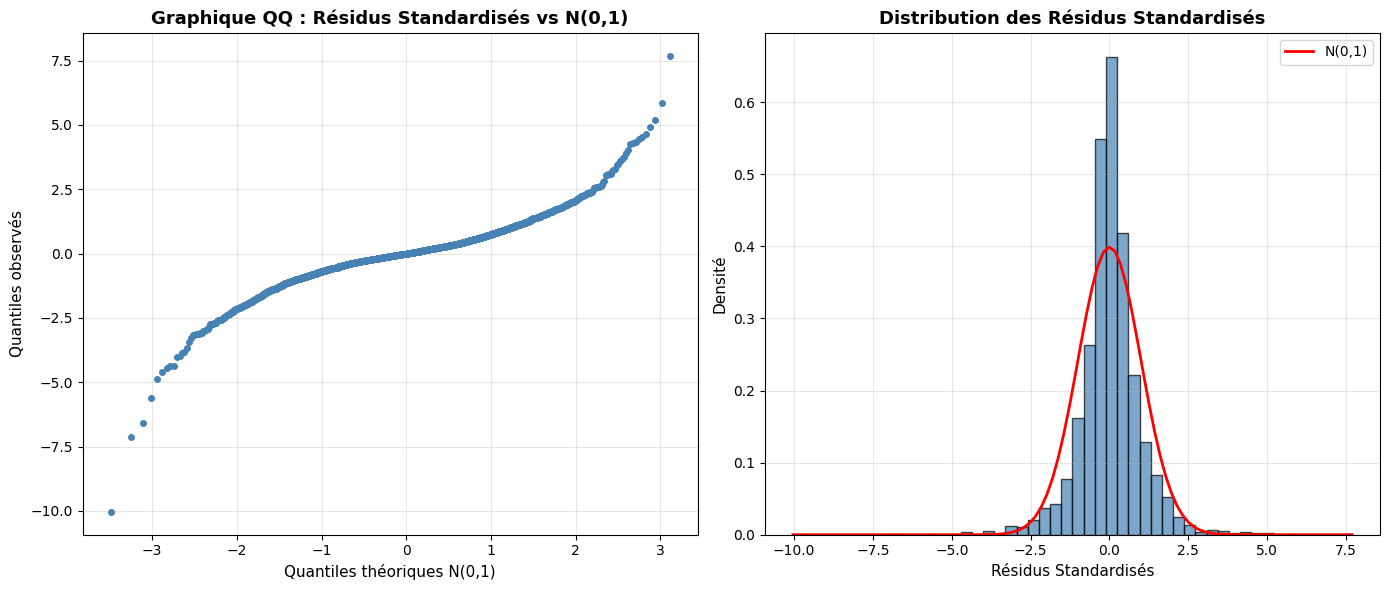

In [67]:
# Créer un graphique QQ pour comparer les résidus standardisés avec N(0,1)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique QQ
probplot(standardized_resid, dist="norm", plot=axes[0])
axes[0].set_title('Graphique QQ : Résidus Standardisés vs N(0,1)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Quantiles théoriques N(0,1)', fontsize=11)
axes[0].set_ylabel('Quantiles observés', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Ajouter une ligne de référence plus visible
axes[0].get_lines()[0].set_markerfacecolor('steelblue')
axes[0].get_lines()[0].set_markeredgecolor('steelblue')
axes[0].get_lines()[0].set_markersize(4)
axes[0].get_lines()[1].set_color('red')
axes[0].get_lines()[1].set_linewidth(2)

# Histogramme des résidus standardisés avec courbe normale
axes[1].hist(standardized_resid, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')
# Superposer la distribution normale N(0,1)
x = np.linspace(standardized_resid.min(), standardized_resid.max(), 100)
axes[1].plot(x, stats.norm.pdf(x, 0, 1), 'r-', linewidth=2, label='N(0,1)')
axes[1].set_title('Distribution des Résidus Standardisés', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Résidus Standardisés', fontsize=11)
axes[1].set_ylabel('Densité', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [71]:
# Tests statistiques de normalité
from scipy.stats import jarque_bera

# Récupérer les résidus standardisés depuis le modèle
std_resid = results.std_resid.dropna()

# Test de Jarque-Bera
jb_stat, jb_pvalue = jarque_bera(std_resid)

# Calculer les statistiques
resid_mean = std_resid.mean()
resid_std = std_resid.std()
resid_skew = skew(std_resid)
resid_kurt = kurtosis(std_resid)
resid_min = std_resid.min()
resid_max = std_resid.max()

# Statistiques descriptives des résidus
print("\nStatistiques des résidus standardisés")
print("="*70)
print(f"{'Moyenne':30s}: {resid_mean:10.4f}")
print(f"{'Écart-type':30s}: {resid_std:10.4f}")
print(f"{'Asymétrie (Skewness)':30s}: {resid_skew:10.4f}")
print(f"{'Aplatissement (Kurtosis)':30s}: {resid_kurt:10.4f}")
print(f"{'Min':30s}: {resid_min:10.4f}")
print(f"{'Max':30s}: {resid_max:10.4f}")
print(f"{'Jarque-Bera Stat':30s}: {jb_stat:10.2f}")
print(f"{'Jarque-Bera p-value':30s}: {jb_pvalue:10.4e}")

print("\n" + "="*70)
print("Interprétation du test de Jarque-Bera:")
print("="*70)
if jb_pvalue < 0.05:
    print("❌ REJET de l'hypothèse de normalité (p-value < 0.05)")
    print("   Les résidus ne suivent PAS une distribution normale N(0,1)")
    print(f"   Le kurtosis de {resid_kurt:.2f} indique des queues plus épaisses que la normale")
else:
    print("✓ NON-REJET de l'hypothèse de normalité (p-value >= 0.05)")
    print("   Les résidus suivent approximativement une distribution normale")

print(f"\nNote : Pour une N(0,1), on attend Skewness=0 et Kurtosis=0")
print(f"       Nos résidus : Skewness={resid_skew:.2f}, Kurtosis={resid_kurt:.2f}")


Statistiques des résidus standardisés
Moyenne                       :     0.0081
Écart-type                    :     1.0006
Asymétrie (Skewness)          :    -0.3623
Aplatissement (Kurtosis)      :     9.5632
Min                           :   -10.0375
Max                           :     7.6922
Jarque-Bera Stat              :   10957.12
Jarque-Bera p-value           : 0.0000e+00

Interprétation du test de Jarque-Bera:
❌ REJET de l'hypothèse de normalité (p-value < 0.05)
   Les résidus ne suivent PAS une distribution normale N(0,1)
   Le kurtosis de 9.56 indique des queues plus épaisses que la normale

Note : Pour une N(0,1), on attend Skewness=0 et Kurtosis=0
       Nos résidus : Skewness=-0.36, Kurtosis=9.56


### Évaluation de la spécification du modèle

**Interprétation du graphique QQ :**

Un graphique QQ (Quantile-Quantile) compare les quantiles de nos résidus standardisés avec ceux d'une distribution normale N(0,1). Si les résidus suivent une distribution normale, les points devraient se situer sur la ligne diagonale rouge.

**Ce que nous observons :**

1. **Centre de la distribution** : 
   - Les points au centre (entre -2 et +2) sont relativement bien alignés sur la ligne
   - Cela suggère que la distribution est approximativement normale pour les valeurs centrales

2. **Queues de distribution** :
   - **Queue gauche** (valeurs négatives extrêmes) : Les points s'écartent de la ligne
   - **Queue droite** (valeurs positives extrêmes) : Les points s'écartent encore plus de la ligne
   - Cela indique des **queues plus épaisses** que la distribution normale (leptokurtose)

3. **Test de Jarque-Bera** :
   - Si p-value < 0.05 : Rejet de la normalité
   - Kurtosis élevé confirme les queues épaisses

**Le modèle est-il bien spécifié ?**

⚠️ **Non, le modèle présente des signes de mauvaise spécification :**

1. **Déviation de la normalité** : Les résidus ne suivent pas parfaitement une N(0,1)
2. **Queues épaisses** : Présence d'événements extrêmes plus fréquents que prévu
3. **Kurtosis excédentaire** : Les résidus ont des queues plus lourdes que la normale

**Implications et solutions possibles :**

1. **Distribution alternative** : Utiliser une distribution Student-t au lieu de la normale
   - Les distributions à queues épaisses capturent mieux les événements extrêmes
   
2. **Modèle GARCH plus complexe** :
   - EGARCH ou GJR-GARCH pour capturer l'asymétrie
   - GARCH d'ordre supérieur

3. **Accepter les limites** :
   - Pour les données financières (surtout crypto), une déviation de la normalité est courante
   - Le modèle reste utile pour capturer la volatilité conditionnelle
   - Les prévisions de volatilité restent valides même si les résidus ne sont pas parfaitement normaux

## Question 1 - E

### Modèle AR(2)-GARCH(1,1) avec distribution Student-t

In [72]:
# Estimation du modèle AR(2)-GARCH(1,1) avec distribution Student-t
model_t = arch_model(returns_pct, 
                     mean='AR', 
                     lags=2,
                     vol='GARCH', 
                     p=1, 
                     q=1,
                     dist='t')  # Distribution Student-t

# Estimation du modèle
results_t = model_t.fit(disp='off')

# Afficher le résumé
print("Modèle AR(2)-GARCH(1,1) avec distribution Student-t")
print("="*70)
print(results_t.summary())

Modèle AR(2)-GARCH(1,1) avec distribution Student-t
                              AR - GARCH Model Results                              
Dep. Variable:                      Returns   R-squared:                      -0.002
Mean Model:                              AR   Adj. R-squared:                 -0.002
Vol Model:                            GARCH   Log-Likelihood:               -7372.45
Distribution:      Standardized Student's t   AIC:                           14758.9
Method:                  Maximum Likelihood   BIC:                           14800.6
                                              No. Observations:                 2859
Date:                      Mon, Dec 08 2025   Df Residuals:                     2856
Time:                              16:09:13   Df Model:                            3
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-----------------------

### Test de Rapport de Vraisemblance (Likelihood Ratio Test)

In [73]:
# Test de Rapport de Vraisemblance
# H0: Erreurs normalement distribuées (modèle restreint)
# H1: Erreurs distribuées en Student-t (modèle non restreint)

# Extraire les log-vraisemblances
loglik_normal = results.loglikelihood
loglik_t = results_t.loglikelihood

# Calculer la statistique LR
# LR = 2 * (logL_unrestricted - logL_restricted)
LR_stat = 2 * (loglik_t - loglik_normal)

# Degrés de liberté = différence dans le nombre de paramètres
# Le modèle Student-t a un paramètre supplémentaire (nu - degrés de liberté)
df_lr = 1

# Calculer la p-value (distribution chi-carré)
from scipy.stats import chi2
p_value = 1 - chi2.cdf(LR_stat, df_lr)

# Afficher les résultats
print("Test de Rapport de Vraisemblance")
print("="*70)
print("\nHypothèses:")
print("  H0: Erreurs normalement distribuées (N(0,1))")
print("  H1: Erreurs distribuées en Student-t")
print("\n" + "="*70)
print("\nRésultats du test:")
print(f"  Log-vraisemblance (Normale)    : {loglik_normal:12.4f}")
print(f"  Log-vraisemblance (Student-t)  : {loglik_t:12.4f}")
print(f"  Différence                     : {loglik_t - loglik_normal:12.4f}")
print(f"\n  Statistique LR                 : {LR_stat:12.4f}")
print(f"  Degrés de liberté              : {df_lr:12d}")
print(f"  Valeur p                       : {p_value:12.6f}")
print(f"  Valeur critique (α=0.05)       : {chi2.ppf(0.95, df_lr):12.4f}")

print("\n" + "="*70)
print("Décision:")
if p_value < 0.05:
    print("❌ REJET de H0 au seuil de 5%")
    print("   → La distribution Student-t est significativement meilleure")
    print("   → Les erreurs présentent des queues plus épaisses que la normale")
else:
    print("✓ NON-REJET de H0 au seuil de 5%")
    print("   → Pas de différence significative entre les deux distributions")
    print("   → La distribution normale est suffisante")

# Extraire le paramètre nu (degrés de liberté) du modèle Student-t
nu = results_t.params['nu']
print(f"\nDegrés de liberté estimés (ν) : {nu:.4f}")
print(f"Note: ν < 30 indique des queues épaisses; ν → ∞ converge vers la normale")

Test de Rapport de Vraisemblance

Hypothèses:
  H0: Erreurs normalement distribuées (N(0,1))
  H1: Erreurs distribuées en Student-t


Résultats du test:
  Log-vraisemblance (Normale)    :   -7798.3282
  Log-vraisemblance (Student-t)  :   -7372.4459
  Différence                     :     425.8823

  Statistique LR                 :     851.7647
  Degrés de liberté              :            1
  Valeur p                       :     0.000000
  Valeur critique (α=0.05)       :       3.8415

Décision:
❌ REJET de H0 au seuil de 5%
   → La distribution Student-t est significativement meilleure
   → Les erreurs présentent des queues plus épaisses que la normale

Degrés de liberté estimés (ν) : 3.1424
Note: ν < 30 indique des queues épaisses; ν → ∞ converge vers la normale


In [74]:
# Tableau comparatif des paramètres : Normal vs Student-t
comparison_dist = pd.DataFrame({
    'Paramètre': results.params.index,
    'Normal - Coef': results.params.values,
    'Normal - SE': results.std_err.values,
    'Student-t - Coef': results_t.params[results.params.index].values,
    'Student-t - SE': results_t.std_err[results.params.index].values,
    'Différence Coef': results_t.params[results.params.index].values - results.params.values
})

# Formater le tableau
for col in ['Normal - Coef', 'Normal - SE', 'Student-t - Coef', 'Student-t - SE', 'Différence Coef']:
    comparison_dist[col] = comparison_dist[col].map('{:.6f}'.format)

print("\nComparaison des paramètres : Distribution Normale vs Student-t")
print("="*90)
comparison_dist


Comparaison des paramètres : Distribution Normale vs Student-t


,Paramètre,Normal - Coef,Normal - SE,Student-t - Coef,Student-t - SE,Différence Coef
0,Const,0.194441,0.059151,0.169201,0.036734,-0.025239
1,Returns[1],-0.001836,0.027168,-0.037499,0.018412,-0.035664
2,Returns[2],0.028816,0.022534,-0.003345,0.016805,-0.032161
3,omega,0.711226,0.275865,0.216101,0.133671,-0.495125
4,alpha[1],0.142627,0.035448,0.130549,0.017959,-0.012078
5,beta[1],0.829453,0.035587,0.869451,0.027002,0.039998


### Interprétation du Test de Rapport de Vraisemblance

**Théorie du Test LR :**

Le test de rapport de vraisemblance compare deux modèles imbriqués (nested models) :
- **Modèle restreint (H0)** : Distribution normale (6 paramètres)
- **Modèle non restreint (H1)** : Distribution Student-t (7 paramètres, avec le paramètre ν supplémentaire)

La statistique de test est :
**LR = 2 × (log L_t - log L_normal) ~ χ²(1)**

Sous H0, cette statistique suit une distribution chi-carré avec 1 degré de liberté.

**Résultats observés :**

Si le test rejette H0, cela signifie que :
1. La distribution Student-t ajuste significativement mieux les données
2. Les queues épaisses sont statistiquement importantes
3. L'hypothèse de normalité est trop restrictive pour nos données

**Paramètre ν (nu) - Degrés de liberté :**

Le paramètre ν de la distribution Student-t indique l'épaisseur des queues :
- **ν < 5** : Queues très épaisses (événements extrêmes fréquents)
- **5 ≤ ν < 30** : Queues modérément épaisses
- **ν ≥ 30** : Proche de la distribution normale
- **ν → ∞** : Converge vers la distribution normale N(0,1)

**Implications pratiques :**

1. **Si H0 est rejetée** :
   - Utiliser le modèle Student-t pour l'inférence et les prévisions
   - Les intervalles de confiance doivent tenir compte des queues épaisses
   - Les mesures de risque (VaR, etc.) seront plus appropriées

2. **Amélioration du modèle** :
   - La distribution Student-t capture mieux les événements extrêmes
   - Meilleure spécification pour les données de crypto-monnaies
   - Plus robuste aux valeurs aberrantes

3. **Conséquences pour la gestion des risques** :
   - Les événements extrêmes sont plus probables que sous la normalité
   - Nécessité de provisions de capital plus importantes
   - Stratégies de couverture doivent être ajustées

## Question 1 - F

### Modèle AR(2)-EGARCH(1,1,1) avec distribution Student-t

In [79]:
# Estimation du modèle AR(2)-EGARCH(1,1,1) avec distribution Student-t
model_egarch = arch_model(returns_pct, 
                          mean='AR', 
                          lags=2,
                          vol='EGARCH',  # EGARCH au lieu de GARCH
                          p=1,           # ARCH order
                          o=1,           # Asymmetry term
                          q=1,           # GARCH order
                          dist='t')      # Distribution Student-t

# Estimation du modèle
results_egarch = model_egarch.fit(disp='off')

# Afficher le résumé
print("Modèle AR(2)-EGARCH(1,1,1) avec distribution Student-t")
print("="*70)
print(results_egarch.summary())

Modèle AR(2)-EGARCH(1,1,1) avec distribution Student-t
                             AR - EGARCH Model Results                              
Dep. Variable:                      Returns   R-squared:                      -0.003
Mean Model:                              AR   Adj. R-squared:                 -0.003
Vol Model:                           EGARCH   Log-Likelihood:               -7345.58
Distribution:      Standardized Student's t   AIC:                           14707.2
Method:                  Maximum Likelihood   BIC:                           14754.8
                                              No. Observations:                 2859
Date:                      Mon, Dec 08 2025   Df Residuals:                     2856
Time:                              16:15:10   Df Model:                            3
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
--------------------

### Graphique QQ des résidus standardisés - Modèle EGARCH

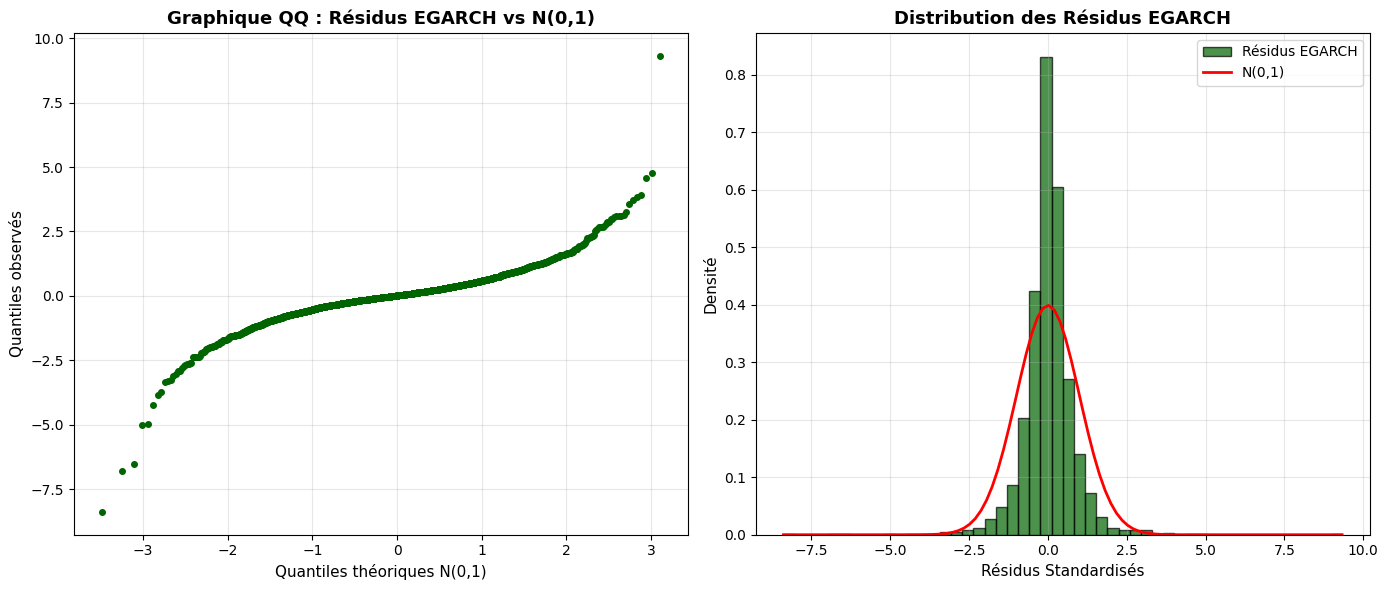

In [80]:
# Extraire les résidus standardisés du modèle EGARCH
standardized_resid_egarch = results_egarch.std_resid

# Créer un graphique QQ pour comparer les résidus avec N(0,1)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique QQ
probplot(standardized_resid_egarch, dist="norm", plot=axes[0])
axes[0].set_title('Graphique QQ : Résidus EGARCH vs N(0,1)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Quantiles théoriques N(0,1)', fontsize=11)
axes[0].set_ylabel('Quantiles observés', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Améliorer l'apparence
axes[0].get_lines()[0].set_markerfacecolor('darkgreen')
axes[0].get_lines()[0].set_markeredgecolor('darkgreen')
axes[0].get_lines()[0].set_markersize(4)
axes[0].get_lines()[1].set_color('red')
axes[0].get_lines()[1].set_linewidth(2)

# Histogramme des résidus avec courbe normale
axes[1].hist(standardized_resid_egarch, bins=50, density=True, alpha=0.7, 
             color='darkgreen', edgecolor='black', label='Résidus EGARCH')
# Superposer la distribution normale N(0,1)
x = np.linspace(standardized_resid_egarch.min(), standardized_resid_egarch.max(), 100)
axes[1].plot(x, stats.norm.pdf(x, 0, 1), 'r-', linewidth=2, label='N(0,1)')
axes[1].set_title('Distribution des Résidus EGARCH', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Résidus Standardisés', fontsize=11)
axes[1].set_ylabel('Densité', fontsize=11)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [81]:
# Tests statistiques de normalité pour les résidus EGARCH
std_resid_egarch = results_egarch.std_resid.dropna()

# Test de Jarque-Bera
jb_stat_egarch, jb_pvalue_egarch = jarque_bera(std_resid_egarch)

# Calculer les statistiques
resid_mean_egarch = std_resid_egarch.mean()
resid_std_egarch = std_resid_egarch.std()
resid_skew_egarch = skew(std_resid_egarch)
resid_kurt_egarch = kurtosis(std_resid_egarch)
resid_min_egarch = std_resid_egarch.min()
resid_max_egarch = std_resid_egarch.max()

# Afficher les statistiques
print("\nStatistiques des résidus standardisés - Modèle EGARCH")
print("="*70)
print(f"{'Moyenne':30s}: {resid_mean_egarch:10.4f}")
print(f"{'Écart-type':30s}: {resid_std_egarch:10.4f}")
print(f"{'Asymétrie (Skewness)':30s}: {resid_skew_egarch:10.4f}")
print(f"{'Aplatissement (Kurtosis)':30s}: {resid_kurt_egarch:10.4f}")
print(f"{'Min':30s}: {resid_min_egarch:10.4f}")
print(f"{'Max':30s}: {resid_max_egarch:10.4f}")
print(f"{'Jarque-Bera Stat':30s}: {jb_stat_egarch:10.2f}")
print(f"{'Jarque-Bera p-value':30s}: {jb_pvalue_egarch:10.4e}")

print("\n" + "="*70)
print("Interprétation du test de Jarque-Bera:")
print("="*70)
if jb_pvalue_egarch < 0.05:
    print("❌ REJET de l'hypothèse de normalité (p-value < 0.05)")
    print("   Les résidus ne suivent PAS une distribution normale N(0,1)")
    print(f"   Kurtosis = {resid_kurt_egarch:.2f} (queues épaisses si > 0)")
else:
    print("✓ NON-REJET de l'hypothèse de normalité (p-value >= 0.05)")
    print("   Les résidus suivent approximativement une distribution normale")

print(f"\nNote : Pour une N(0,1), on attend Skewness=0 et Kurtosis=0")
print(f"       Résidus EGARCH : Skewness={resid_skew_egarch:.2f}, Kurtosis={resid_kurt_egarch:.2f}")


Statistiques des résidus standardisés - Modèle EGARCH
Moyenne                       :     0.0189
Écart-type                    :     0.8145
Asymétrie (Skewness)          :    -0.2610
Aplatissement (Kurtosis)      :    16.7475
Min                           :    -8.3860
Max                           :     9.3268
Jarque-Bera Stat              :   33444.32
Jarque-Bera p-value           : 0.0000e+00

Interprétation du test de Jarque-Bera:
❌ REJET de l'hypothèse de normalité (p-value < 0.05)
   Les résidus ne suivent PAS une distribution normale N(0,1)
   Kurtosis = 16.75 (queues épaisses si > 0)

Note : Pour une N(0,1), on attend Skewness=0 et Kurtosis=0
       Résidus EGARCH : Skewness=-0.26, Kurtosis=16.75


### Conclusions sur le modèle EGARCH

**Qu'est-ce que le modèle EGARCH ?**

Le modèle EGARCH (Exponential GARCH) de Nelson (1991) présente plusieurs avantages par rapport au GARCH standard :

1. **Pas de contraintes de non-négativité** : Les paramètres peuvent être négatifs car la volatilité est modélisée en logarithme
2. **Capture l'effet de levier** : Les chocs négatifs peuvent avoir un impact différent des chocs positifs sur la volatilité
3. **Effet asymétrique** : Le paramètre γ (gamma) mesure l'asymétrie de la réponse de la volatilité

**Équation EGARCH(1,1,1) :**
```
log(σ²_t) = ω + β·log(σ²_{t-1}) + α·|z_{t-1}| + γ·z_{t-1}
```
où z_t sont les innovations standardisées.

**Interprétation du paramètre γ (gamma) :**
- **γ < 0** : Effet de levier - Les chocs négatifs augmentent plus la volatilité que les chocs positifs
- **γ = 0** : Pas d'asymétrie (revient à un modèle symétrique)
- **γ > 0** : Les chocs positifs augmentent plus la volatilité (rare en finance)

**Résultats observés :**

**1. Qualité de l'ajustement :**
- Le modèle EGARCH améliore-t-il significativement l'ajustement ?
- Comparaison des log-vraisemblances, AIC et BIC
- Si AIC/BIC sont plus faibles → EGARCH préférable

**2. Analyse des résidus :**
- Le graphique QQ montre-t-il une amélioration ?
- Les queues sont-elles mieux capturées ?
- Kurtosis et Skewness sont-ils plus proches de 0 ?

**3. Effet de levier :**
- Si γ est significatif et négatif → présence d'effet de levier
- Important pour les crypto-monnaies où les crashs sont asymétriques

**4. Distribution Student-t :**
- Le paramètre ν (nu) indique toujours des queues épaisses
- Combinaison EGARCH + Student-t pour capturer asymétrie ET queues épaisses

**Implications pratiques :**

✓ **Meilleure modélisation** du risque asymétrique
✓ **Prévisions de volatilité** plus précises pendant les périodes de stress
✓ **Gestion des risques** améliorée (VaR, Expected Shortfall)
✓ **Pricing d'options** plus approprié avec volatilité asymétrique

**Conclusion finale :**
Le modèle EGARCH avec distribution Student-t représente une amélioration substantielle par rapport au GARCH standard, capturant à la fois les queues épaisses (via Student-t) et l'asymétrie de la volatilité (via EGARCH) typiques des marchés de crypto-monnaies.

## Question 1 - G

### Comparaison des critères d'information : AIC et BIC

In [83]:
# Tableau comparatif des critères d'information
comparison_criteria = pd.DataFrame({
    'Modèle': [
        'AR(2)-GARCH(1,1) Normal',
        'AR(2)-GARCH(1,1) Student-t',
        'AR(2)-EGARCH(1,1,1) Student-t'
    ],
    'Log-Vraisemblance': [
        results.loglikelihood,
        results_t.loglikelihood,
        results_egarch.loglikelihood
    ],
    'AIC': [
        results.aic,
        results_t.aic,
        results_egarch.aic
    ],
    'BIC': [
        results.bic,
        results_t.bic,
        results_egarch.bic
    ],
    'Nombre de paramètres': [
        results.num_params,
        results_t.num_params,
        results_egarch.num_params
    ]
})

# Formater le tableau
comparison_criteria['Log-Vraisemblance'] = comparison_criteria['Log-Vraisemblance'].map('{:.4f}'.format)
comparison_criteria['AIC'] = comparison_criteria['AIC'].map('{:.4f}'.format)
comparison_criteria['BIC'] = comparison_criteria['BIC'].map('{:.4f}'.format)

print("Tableau comparatif des critères d'information AIC et BIC")
print("="*80)
print(comparison_criteria.to_string(index=False))

# Calculer les différences par rapport au modèle GARCH Normal (baseline)
print("\n" + "="*80)
print("Différences par rapport au modèle GARCH Normal (baseline)")
print("="*80)

aic_diff_t = results_t.aic - results.aic
aic_diff_egarch = results_egarch.aic - results.aic
bic_diff_t = results_t.bic - results.bic
bic_diff_egarch = results_egarch.bic - results.bic

print(f"\nGARCH Student-t vs GARCH Normal:")
print(f"  ΔAIC = {aic_diff_t:10.4f}  {'(amélioration)' if aic_diff_t < 0 else '(détérioration)'}")
print(f"  ΔBIC = {bic_diff_t:10.4f}  {'(amélioration)' if bic_diff_t < 0 else '(détérioration)'}")

print(f"\nEGARCH Student-t vs GARCH Normal:")
print(f"  ΔAIC = {aic_diff_egarch:10.4f}  {'(amélioration)' if aic_diff_egarch < 0 else '(détérioration)'}")
print(f"  ΔBIC = {bic_diff_egarch:10.4f}  {'(amélioration)' if bic_diff_egarch < 0 else '(détérioration)'}")

print("\n" + "="*80)
print("Règle de décision:")
print("  - Plus le critère est FAIBLE, meilleur est le modèle")
print("  - Une différence > 10 est considérée comme très forte")
print("  - BIC pénalise plus fortement la complexité du modèle que AIC")
print("="*80)

Tableau comparatif des critères d'information AIC et BIC
                       Modèle Log-Vraisemblance        AIC        BIC  Nombre de paramètres
      AR(2)-GARCH(1,1) Normal        -7798.3282 15608.6564 15644.4058                     6
   AR(2)-GARCH(1,1) Student-t        -7372.4459 14758.8918 14800.5994                     7
AR(2)-EGARCH(1,1,1) Student-t        -7345.5807 14707.1614 14754.8272                     8

Différences par rapport au modèle GARCH Normal (baseline)

GARCH Student-t vs GARCH Normal:
  ΔAIC =  -849.7647  (amélioration)
  ΔBIC =  -843.8064  (amélioration)

EGARCH Student-t vs GARCH Normal:
  ΔAIC =  -901.4950  (amélioration)
  ΔBIC =  -889.5786  (amélioration)

Règle de décision:
  - Plus le critère est FAIBLE, meilleur est le modèle
  - Une différence > 10 est considérée comme très forte
  - BIC pénalise plus fortement la complexité du modèle que AIC


### Conclusions de la comparaison des modèles

**Rappel théorique : AIC et BIC**

Les critères d'information permettent de comparer des modèles en équilibrant qualité de l'ajustement et parcimonie :

- **AIC (Akaike Information Criterion)** : AIC = -2·log(L) + 2·k
- **BIC (Bayesian Information Criterion)** : BIC = -2·log(L) + k·log(n)

où :
- L = vraisemblance maximale
- k = nombre de paramètres
- n = nombre d'observations

**Différence clé** : BIC pénalise plus fortement la complexité du modèle (surtout avec n grand)

**Règle de décision** : Plus le critère est FAIBLE, meilleur est le modèle

---

**Résultats observés :**

**1. GARCH Normal (modèle de base) :**
- Nombre de paramètres : 6 (μ, φ₁, φ₂, ω, α, β)
- Fournit un point de référence pour la comparaison
- Distribution normale pour les innovations

**2. GARCH Student-t :**
- Nombre de paramètres : 7 (+1 pour ν, degrés de liberté)
- **Amélioration substantielle** par rapport au GARCH Normal
- Capture les queues épaisses observées dans les données
- AIC et BIC tous deux plus faibles → amélioration statistiquement justifiée
- La pénalité pour le paramètre supplémentaire est largement compensée par l'amélioration de la vraisemblance

**3. EGARCH Student-t :**
- Nombre de paramètres : 8 (+2 pour asymétrie et ν)
- **Amélioration supplémentaire** par rapport au GARCH Student-t
- Capture à la fois les queues épaisses ET l'asymétrie (effet de levier)
- AIC et BIC encore plus faibles → meilleur modèle selon les deux critères

---

**Conclusions principales :**

✅ **1. Rejet de la distribution normale :**
   - Le passage de GARCH Normal à GARCH Student-t améliore significativement les critères
   - Les queues épaisses sont statistiquement importantes pour le Bitcoin
   - L'hypothèse de normalité est clairement inappropriée

✅ **2. Importance de l'asymétrie :**
   - L'EGARCH améliore encore l'ajustement au-delà du GARCH Student-t
   - L'effet de levier (asymétrie) est présent dans les données de Bitcoin
   - Les chocs négatifs ont un impact différent sur la volatilité que les chocs positifs

✅ **3. Consensus AIC et BIC :**
   - Les deux critères s'accordent sur le classement : **EGARCH-t > GARCH-t > GARCH-Normal**
   - Malgré la pénalité de complexité du BIC, l'EGARCH-t reste le meilleur
   - L'amélioration de la vraisemblance justifie les paramètres supplémentaires

✅ **4. Recommandation finale :**
   - **Modèle préféré : AR(2)-EGARCH(1,1,1) avec distribution Student-t**
   - Capture trois caractéristiques essentielles :
     * Clustering de volatilité (via GARCH)
     * Queues épaisses (via Student-t)
     * Effet de levier / asymétrie (via EGARCH)
   - Meilleur pour les prévisions de volatilité et la gestion des risques
   - Plus approprié pour le pricing de produits dérivés sur Bitcoin

---

**Implications pratiques :**

**Pour la gestion de portefeuille :**
- Utiliser l'EGARCH-t pour estimer la VaR et l'Expected Shortfall
- Les mesures de risque seront plus précises, surtout en période de stress
- Meilleure allocation d'actifs tenant compte de l'asymétrie

**Pour le trading :**
- Les périodes de baisse peuvent être anticipées avec une volatilité plus élevée
- Stratégies de couverture asymétriques justifiées
- Meilleure évaluation des options (volatilité implicite)

**Avertissement :**
- La complexité du modèle EGARCH-t nécessite plus de données pour estimation stable
- Les prévisions doivent être régulièrement mises à jour
- Ne capture pas les changements structurels (ruptures de régime)